Date : 27/12/2023

## Transfer Learning

### Imports

In [1]:
### -------------------
### Importing libraries
### -------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
# import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

2023-12-27 13:09:14.750839: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 13:09:14.753546: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 13:09:14.791149: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 13:09:14.791181: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 13:09:14.791201: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

### Global variables

### Create the image generator object to read images

In [2]:
train_datagen= ImageDataGenerator(rescale=1/255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

# Read the images

In [4]:
train_dataset = train_datagen.flow_from_directory('/home/dai/7. NLP & CV/NLP/Imagenet_new/train', 
                                         class_mode = 'categorical',
                                         target_size = (64,64),
                                          batch_size=32
                                         )

Found 5000 images belonging to 10 classes.


In [5]:
classes=train_dataset.class_indices
classes

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [6]:
train_dataset.filenames

['crocodile/images/n01698640_0.JPEG',
 'crocodile/images/n01698640_1.JPEG',
 'crocodile/images/n01698640_10.JPEG',
 'crocodile/images/n01698640_100.JPEG',
 'crocodile/images/n01698640_101.JPEG',
 'crocodile/images/n01698640_102.JPEG',
 'crocodile/images/n01698640_103.JPEG',
 'crocodile/images/n01698640_104.JPEG',
 'crocodile/images/n01698640_105.JPEG',
 'crocodile/images/n01698640_106.JPEG',
 'crocodile/images/n01698640_107.JPEG',
 'crocodile/images/n01698640_108.JPEG',
 'crocodile/images/n01698640_109.JPEG',
 'crocodile/images/n01698640_11.JPEG',
 'crocodile/images/n01698640_110.JPEG',
 'crocodile/images/n01698640_111.JPEG',
 'crocodile/images/n01698640_112.JPEG',
 'crocodile/images/n01698640_113.JPEG',
 'crocodile/images/n01698640_114.JPEG',
 'crocodile/images/n01698640_115.JPEG',
 'crocodile/images/n01698640_116.JPEG',
 'crocodile/images/n01698640_117.JPEG',
 'crocodile/images/n01698640_118.JPEG',
 'crocodile/images/n01698640_119.JPEG',
 'crocodile/images/n01698640_12.JPEG',
 'croco

# Model creation

In [7]:
def build(input_shape=(64,64,3),num_classes=10):
    """Defines a CNN model with a specified
    input shape and number of classes."""
    model = Sequential()

    model.add(Conv2D(32,(3,3),
                input_shape =input_shape, activation = 'relu')
         )

    model.add(MaxPool2D((2,2)))
    
    model.add(Conv2D(64,(3,3), activation = 'relu'))

    model.add(MaxPool2D((2,2)))
    
  
    
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    return model


In [8]:
model=build()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                1

In [10]:
from keras.utils import plot_model

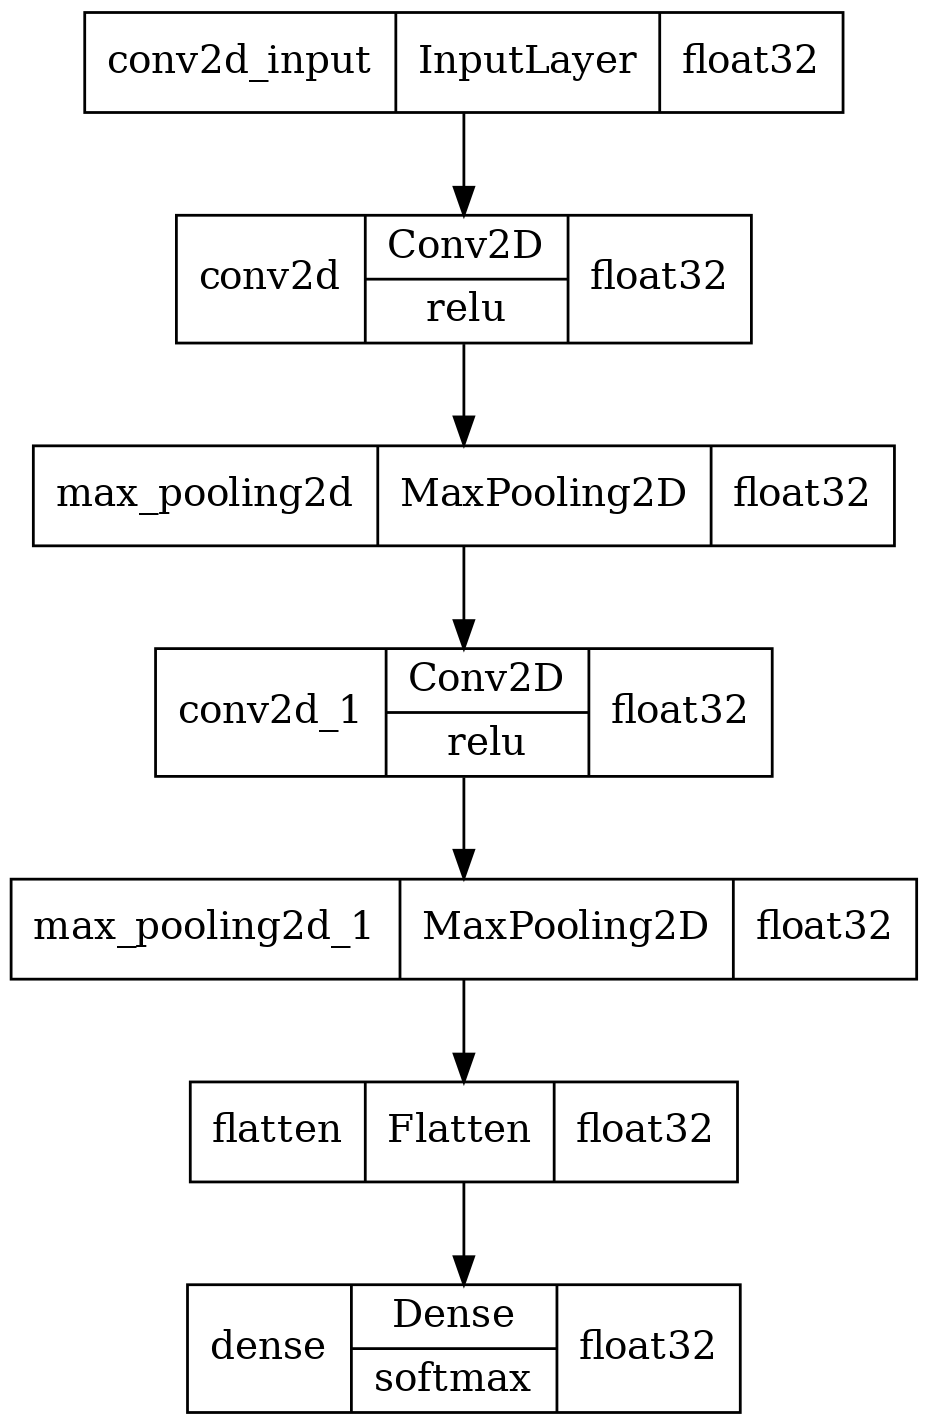

In [11]:
plot_model(model, show_dtype=True,show_layer_activations=True,show_layer_names=True,dpi=200)

# Compile model

In [12]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model

In [13]:
model.fit(train_dataset, epochs = 10,
         batch_size = 64)

Epoch 1/10
157/157 [==============================] - 11s 65ms/step - loss: 1.9601 - accuracy: 0.2988
Epoch 2/10
157/157 [==============================] - 11s 67ms/step - loss: 1.6702 - accuracy: 0.4274
Epoch 3/10
157/157 [==============================] - 11s 67ms/step - loss: 1.5810 - accuracy: 0.4632
Epoch 4/10
157/157 [==============================] - 11s 68ms/step - loss: 1.4713 - accuracy: 0.4962
Epoch 5/10
157/157 [==============================] - 11s 68ms/step - loss: 1.4019 - accuracy: 0.5212
Epoch 6/10
157/157 [==============================] - 11s 68ms/step - loss: 1.3185 - accuracy: 0.5510
Epoch 7/10
157/157 [==============================] - 10s 66ms/step - loss: 1.2710 - accuracy: 0.5704
Epoch 8/10
157/157 [==============================] - 11s 68ms/step - loss: 1.2317 - accuracy: 0.5884
Epoch 9/10
157/157 [==============================] - 11s 68ms/step - loss: 1.1847 - accuracy: 0.6020
Epoch 10/10
157/157 [==============================] - 11s 69ms/step - loss: 1.138

# evaluate the model

In [14]:
model.evaluate(train_dataset)

157/157 [==============================] - 10s 59ms/step - loss: 1.0853 - accuracy: 0.6392


[1.085323691368103, 0.63919997215271]

In [15]:
new=plt.imread('/home/dai/7. NLP & CV/NLP/Imagenet_new/test/images/test_8.JPEG')

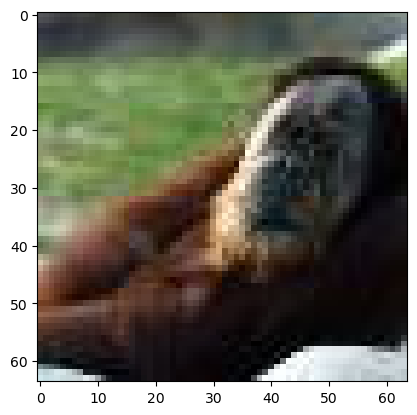

In [16]:
plt.imshow(new)

In [17]:
classes

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [18]:
new=new.reshape(1,64,64,3)

In [19]:
predict=model.predict(new, batch_size = 1)
np.argmax(predict)

1/1 [==============================] - 0s 89ms/step


9

# On validation data

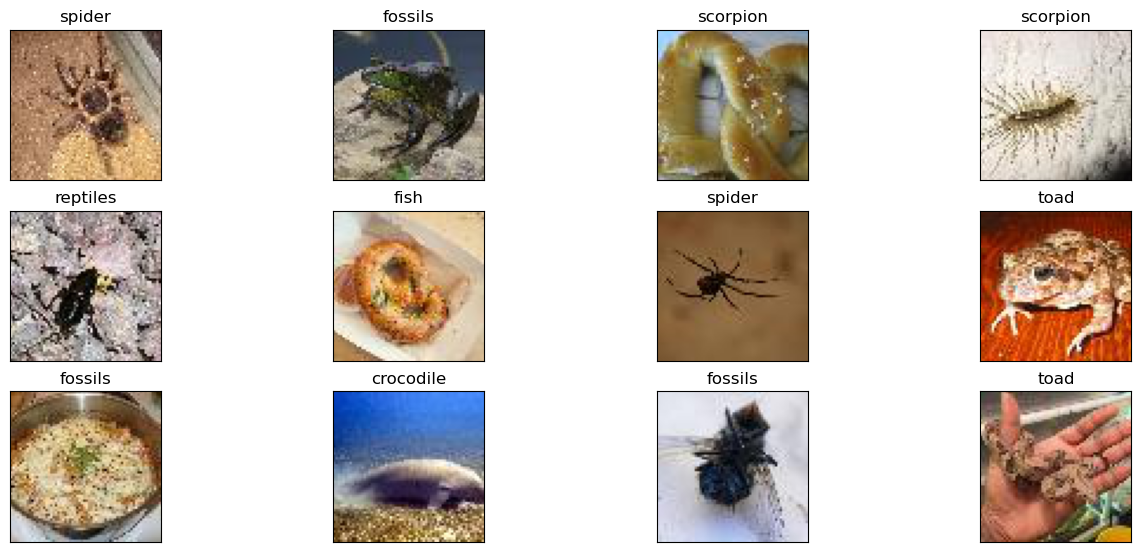

In [20]:
plt.figure(figsize=(16,9))
folder_path='/home/dai/7. NLP & CV/NLP/Imagenet_new/val/val_images'
image_filenames=[img for img in os.listdir(folder_path)]
i=1
for img_filename in image_filenames:
    img_path=os.path.join(folder_path,img_filename)
    img=plt.imread(img_path)
    plt.subplot(4,4,i)
    plt.xticks([]); plt.yticks([])
    plt.imshow(img)
    test_image=np.expand_dims(img,axis=0)
    prediction=np.argmax(model.predict(test_image,verbose=0))
    keys=[key for key,val in classes.items() if val==prediction]
    plt.title(keys[0])
    i+=1